FashionMNIST를 활용

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv

from pytorchcv import load_fashion_mnist, train, plot_results, plot_convolution, display_dataset
load_fashion_mnist(batch_size=128) 

위 코드를 실행하면 pytorchcv.py 파일에서 load_fashion_mnist 함수를 불러옵니다

그다음 이미지 데이터의 형태와 클래스 레이블을 시각적으로 탐색하고 분석합니다
시각적인 분석은 Vertical edge와 Horizontal edge로 나눠서 분석합니다

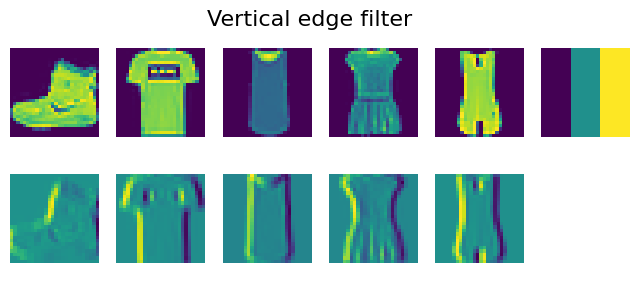

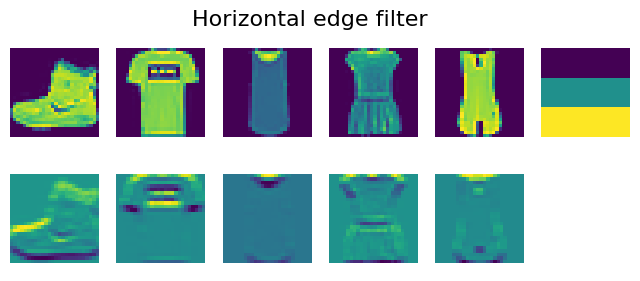

In [6]:
plot_convolution(torch.tensor([[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]),'Vertical edge filter')
plot_convolution(torch.tensor([[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]),'Horizontal edge filter')

추가로 이미지와 레이블 시각화 함수를 이용하여 훈련 데이터와 테스터 데이터에 샘플을 시각화하였습니다

Visualizing training samples:


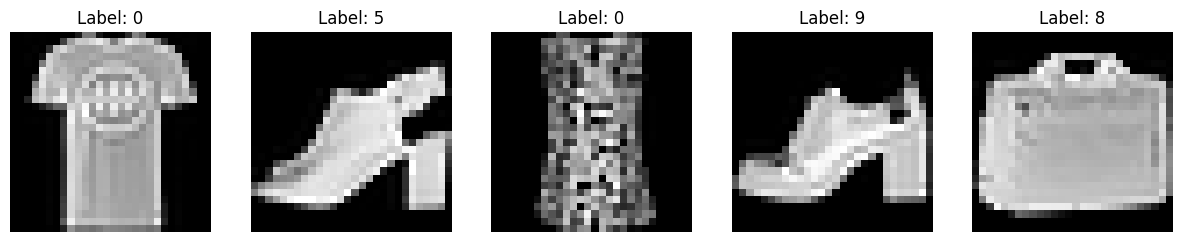

Visualizing test samples:


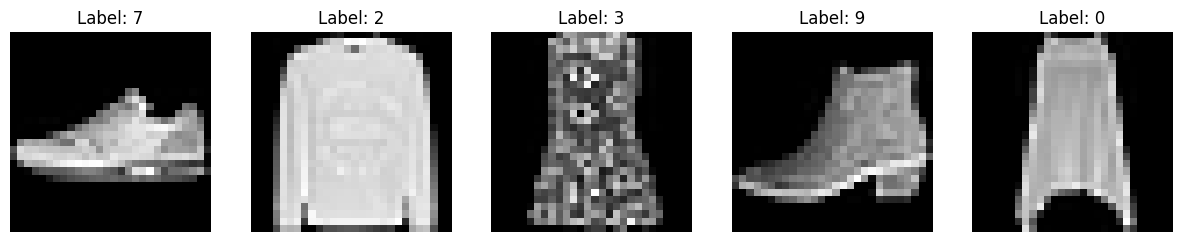

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지와 레이블 시각화 함수
def visualize_samples(dataset, num_samples=5):
    # 임의의 샘플 선택
    sample_indices = np.random.choice(len(dataset), num_samples, replace=False) # 데이터셋에서 임의의 인덱스를 선택합니다.

    # 선택된 샘플 시각화
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3)) # 선택된 샘플을 보여줄 서브플롯을 생성합니다.

    for i, idx in enumerate(sample_indices): # 선택된 샘플에 대해 반복합니다.
        image, label = dataset[idx] # 데이터셋에서 이미지와 레이블을 가져옵니다.
        axes[i].imshow(image.squeeze(), cmap='gray')  # 이미지를 시각화합니다. squeeze 함수를 사용하여 채널 차원을 제거합니다.
        axes[i].set_title(f'Label: {label}') # 서브플롯 제목에 레이블을 표시합니다.
        axes[i].axis('off') # 축을 제거합니다.

    plt.show() # 시각화된 샘플들을 화면에 출력합니다.

# FashionMNIST 데이터셋 로드
load_fashion_mnist()

# 훈련 데이터에서 샘플 시각화
print("Visualizing training samples:") # 훈련 데이터 샘플을 시각화한다는 메시지를 출력합니다.
visualize_samples(data_train)  # 훈련 데이터셋에서 샘플을 시각화합니다.

# 테스트 데이터에서 샘플 시각화
print("Visualizing test samples:") # 테스트 데이터 샘플을 시각화한다는 메시지를 출력합니다.
visualize_samples(data_test) # 테스트 데이터셋에서 샘플을 시각화합니다.


그 다음 간단한 CNN 모델을 구축하고 모델을 컴파일합니다 이후에 적절한 손실 함수와 최적화 알고리즘을 선택하는데
훈련 데이터를 사용하여 모델을 훈련시키고, 훈련 과정에서의 손실과 정확도를 모니터링합니다.
(아래 코드 실행할 때 대략 1분 45초 정도 소모됨)

Epoch [1/5], Train Loss: 0.4869, Train Acc: 0.83%, Val Loss: 0.3649, Val Acc: 0.87%
Epoch [2/5], Train Loss: 0.3383, Train Acc: 0.88%, Val Loss: 0.3177, Val Acc: 0.89%
Epoch [3/5], Train Loss: 0.3037, Train Acc: 0.89%, Val Loss: 0.3126, Val Acc: 0.89%
Epoch [4/5], Train Loss: 0.2794, Train Acc: 0.90%, Val Loss: 0.3007, Val Acc: 0.89%
Epoch [5/5], Train Loss: 0.2639, Train Acc: 0.91%, Val Loss: 0.2720, Val Acc: 0.91%


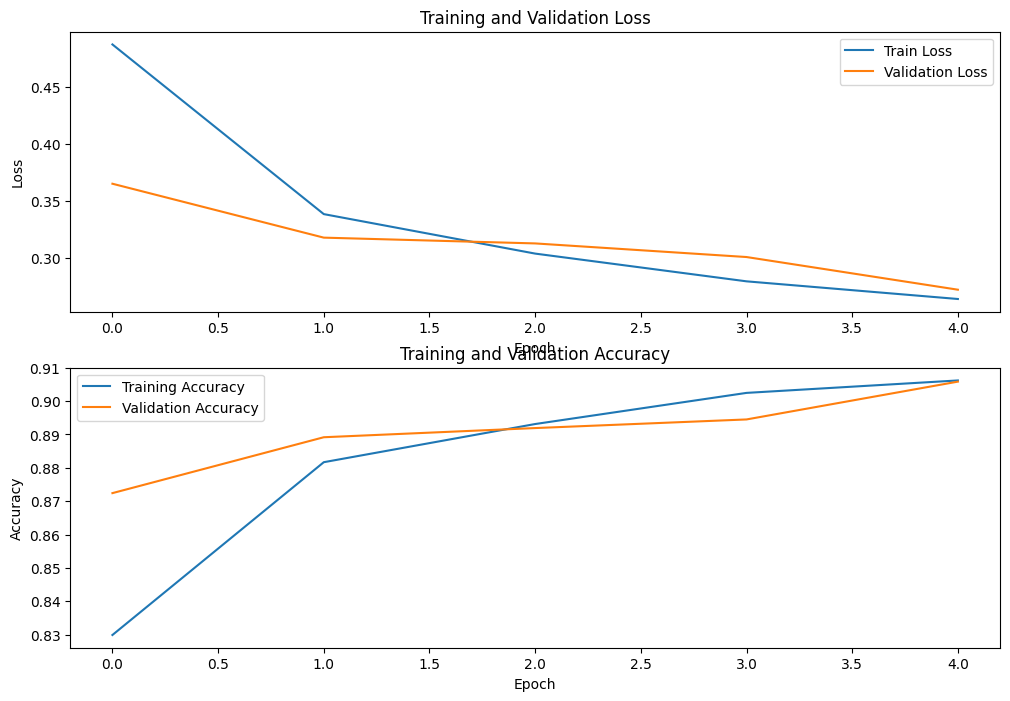

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# FashionMNIST 데이터셋을 불러와서 훈련 및 검증 데이터셋으로 나누기
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) #데이터 변환을 위한 파이토치의 transforms.Compose를 사용하여 이미지를 텐서로 변환하고 정규화합니다.
full_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform) #FashionMNIST 데이터셋을 불러옵니다. root 매개변수로 지정된 경로에 데이터셋을 저장합니다. train=True로 설정하여 훈련 데이터셋을 불러옵니다. download=True로 설정하여 데이터를 인터넷에서 다운로드합니다. transform 매개변수에 지정된 변환을 적용합니다.
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
#훈련 데이터셋과 검증 데이터셋의 크기를 결정하기 위해 전체 데이터셋의 크기를 사용하여 계산합니다.
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size]) #random_split 함수를 사용하여 전체 데이터셋을 훈련 데이터셋과 검증 데이터셋으로 무작위로 분할합니다.

# DataLoader 정의
batch_size = 64 #미니배치의 크기 정의
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#훈련 데이터와 검증 데이터에 대한 DataLoader를 생성합니다. shuffle=True로 설정하여 훈련 데이터셋을 섞습니다.

# 간단한 CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1) # 입력 채널 1, 출력 채널 16, 커널 크기 3x3
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 최대 풀링 레이어, 커널 크기 2x2
        self.fc = nn.Linear(16 * 14 * 14, 10)  # 14x14는 이미지 차원을 줄이는 풀링 레이어로 인해 계산됨

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x))) # 첫 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수와 최대 풀링 레이어를 적용
        x = x.view(-1, 16 * 14 * 14) # 이미지 데이터를 펼쳐서 Fully connected 레이어에 전달
        x = self.fc(x) # Fully connected 레이어를 통과하여 출력을 생성
        return x

# 모델 인스턴스 생성
model = SimpleCNN()

# 손실 함수 및 최적화 알고리즘 설정
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss를 사용하여 손실을 계산
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam 옵티마이저를 사용하여 모델 파라미터를 최적화

# 훈련 함수 수정
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    hist = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []} # 히스토리 딕셔너리를 초기화하여 훈련 및 검증 손실 및 정확도를 추적
    for epoch in range(num_epochs):
        model.train() # 모델을 훈련 모드로 설정
        running_loss = 0.0 # 훈련 손실을 누적할 변수 초기화
        correct_train = 0 # 올바르게 분류된 훈련 샘플 수를 추적할 변수 초기화
        total_train = 0 # 전체 훈련 샘플 수를 추적할 변수 초기화
        for images, labels in train_loader: # 미니배치 단위로 훈련 데이터셋을 반복
            optimizer.zero_grad() # 그래디언트 초기화
            outputs = model(images) # 입력 이미지에 대한 예측 출력을 생성
            loss = criterion(outputs, labels) # 손실 계산
            loss.backward() # 역전파를 통해 그래디언트 계산
            optimizer.step() # 옵티마이저를 사용하여 파라미터 업데이트

            running_loss += loss.item() # 손실 누적
            _, predicted = torch.max(outputs, 1) # 모델의 예측 중 가장 큰 값(확률이 가장 높은 클래스)의 인덱스를 가져옴
            total_train += labels.size(0) # 레이블 수 누적
            correct_train += (predicted == labels).sum().item() # 올바르게 예측된 샘플 수 누적

        # 훈련 손실 및 정확도 계산
        epoch_train_loss = running_loss / len(train_loader) # 훈련 손실 계산
        epoch_train_acc = correct_train / total_train # 훈련 정확도 계산

        # 검증 데이터셋에 대한 손실 및 정확도 계산
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        # 결과 기록
        hist['train_loss'].append(epoch_train_loss) # 훈련 손실 기록
        hist['train_acc'].append(epoch_train_acc) # 훈련 정확도 기록
        hist['val_loss'].append(val_loss) # 검증 손실 기록
        hist['val_acc'].append(val_acc) # 검증 정확도 기록

        # 출력
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    return hist

# 검증 함수 정의
def evaluate(model, val_loader, criterion):
    model.eval() # 모델을 평가 모드로 설정
    running_loss = 0.0 # 검증 손실 누적 변수 초기화
    correct_val = 0 # 올바르게 분류된 검증 샘플 수를 추적할 변수 초기화
    total_val = 0 # 전체 검증 샘플 수를 추적할 변수 초기화
    with torch.no_grad(): # 그래디언트 계산 비활성화
        for images, labels in val_loader: # 미니배치 단위로 검증 데이터셋을 반복
            outputs = model(images) # 입력 이미지에 대한 예측 출력을 생성
            loss = criterion(outputs, labels) # 손실 계산

            running_loss += loss.item() # 손실 누적
            _, predicted = torch.max(outputs, 1) # 모델의 예측 중 가장 큰 값(확률이 가장 높은 클래스)의 인덱스를 가져옴
            total_val += labels.size(0) # 레이블 수 누적
            correct_val += (predicted == labels).sum().item() # 올바르게 예측된 샘플 수 누적

    val_loss = running_loss / len(val_loader) # 검증 손실 계산
    val_acc = correct_val / total_val # 검증 정확도 계산

    return val_loss, val_acc

# 시각화 함수 수정
def plot_results(hist):
    plt.figure(figsize=(12, 8)) # 그래프 크기 설정

    # 훈련 및 검증 손실 시각화
    plt.subplot(2, 1, 1) # subplot 설정
    plt.plot(hist['train_loss'], label='Train Loss') # 훈련 손실 그래프 그리기
    plt.plot(hist['val_loss'], label='Validation Loss') # 검증 손실 그래프 그리기
    plt.xlabel('Epoch') # x축 레이블 설정
    plt.ylabel('Loss') # y축 레이블 설정
    plt.title('Training and Validation Loss') # 그래프 제목 설정
    plt.legend() # 범례 표시

    # 훈련 및 검증 정확도 시각화
    plt.subplot(2, 1, 2) # subplot 설정
    plt.plot(hist['train_acc'], label='Training Accuracy') # 훈련 정확도 그래프 그리기
    plt.plot(hist['val_acc'], label='Validation Accuracy') # 검증 정확도 그래프 그리기
    plt.xlabel('Epoch') # x축 레이블 설정
    plt.ylabel('Accuracy') # y축 레이블 설정
    plt.title('Training and Validation Accuracy') # 그래프 제목 설정
    plt.legend() # 범례 표시

    plt.show() # 그래프 출력

# 모델 훈련
hist = train(model, train_loader, val_loader, criterion, optimizer, num_epochs=5)  # 모델 훈련 및 히스토리 저장

# 결과 시각화
if hist is not None: # 히스토리가 존재하는 경우
    plot_results(hist) # 결과를 시각화하여 출력
else: # 히스토리가 존재하지 않는 경우
    print("Training did not return any history.") # "히스토리가 없습니다" 메시지 출력


Train Loss (훈련 손실): 훈련 데이터셋에 대한 손실. 손실은 모델이 예측과 실제 값 사이의 차이를 나타냅니다
Train Acc (훈련 정확도): 훈련 데이터셋에 대한 정확도. 모델이 훈련 데이터에서 올바르게 분류한 샘플의 비율입니다

Val Loss (검증 손실): 검증 데이터셋에 대한 손실. 이것은 모델이 새로운 데이터에 대해서도 잘 일반화되는지를 나타냅니다
Val Acc (검증 정확도): 검증 데이터셋에 대한 정확도. 모델이 새로운 데이터에서 얼마나 정확하게 예측하는지를 나타냅니다

결과적으로 훈련 데이터에서 좋은 성능을 보이고 있으며, 검증 데이터에서도 일정 수준의 정확도를 유지하고 있음을 확인할 수 있습니다

마지막으로 테스트 데이터셋을 사용하여 모델을 평가하고, 최종 정확도를 보고하는데
잘못 분류된 이미지들을 분석하고, 어떤 클래스가 모델에 의해 가장 잘못 분류되었는지를 식별합니다.

Test Accuracy: 89.37%
True Class: Sneaker
Predicted as Bag: 1 images


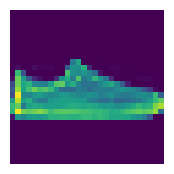

Predicted as Ankle boot: 23 images


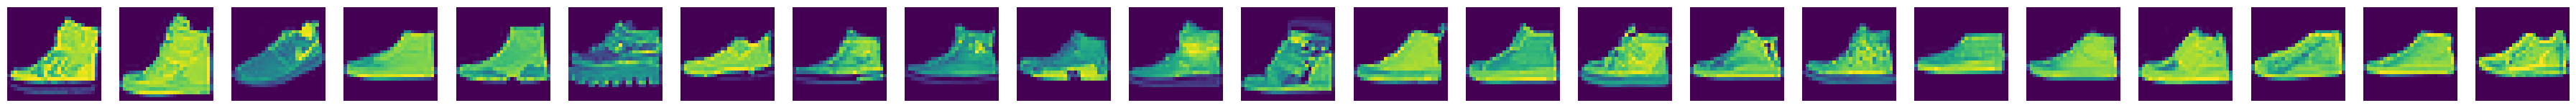

Predicted as Sandal: 9 images


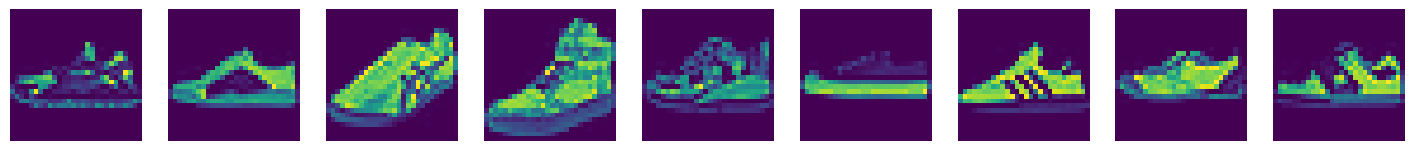

True Class: Ankle boot
Predicted as Sandal: 7 images


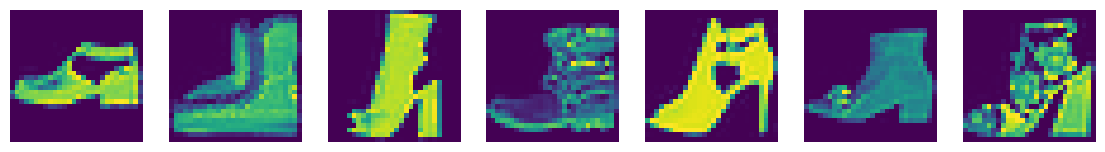

Predicted as Sneaker: 37 images


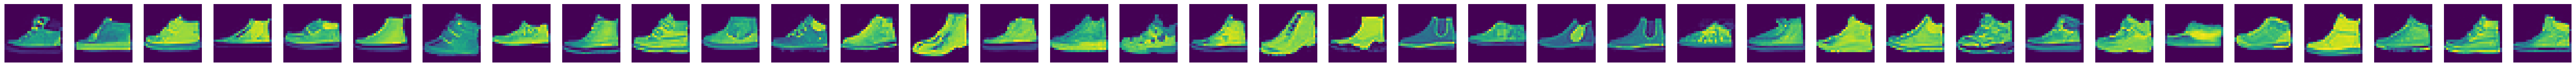

Predicted as Bag: 1 images


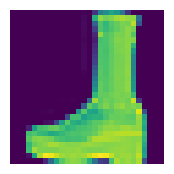

Predicted as Shirt: 2 images


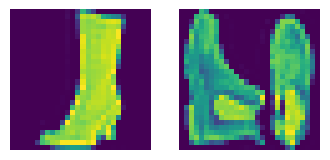

True Class: Coat
Predicted as Shirt: 53 images


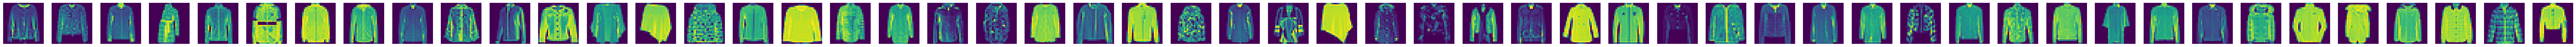

Predicted as Pullover: 68 images


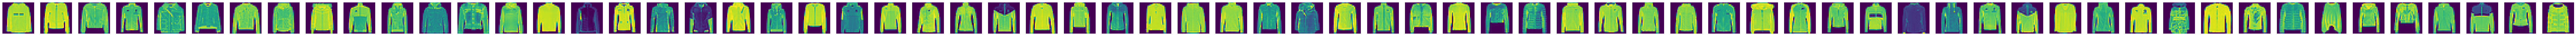

Predicted as Dress: 33 images


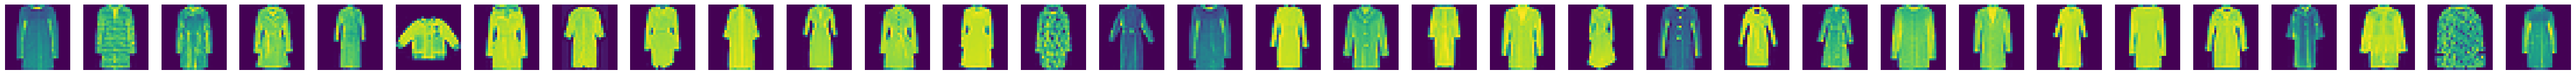

Predicted as Bag: 1 images


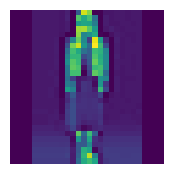

Predicted as T-shirt/top: 1 images


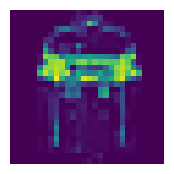

True Class: Shirt
Predicted as T-shirt/top: 119 images


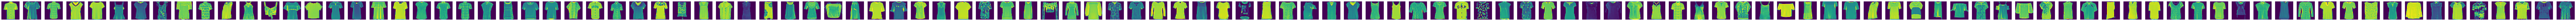

Predicted as Coat: 90 images


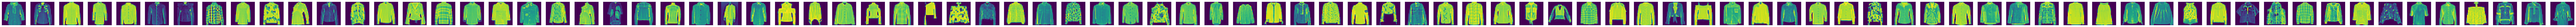

Predicted as Dress: 40 images


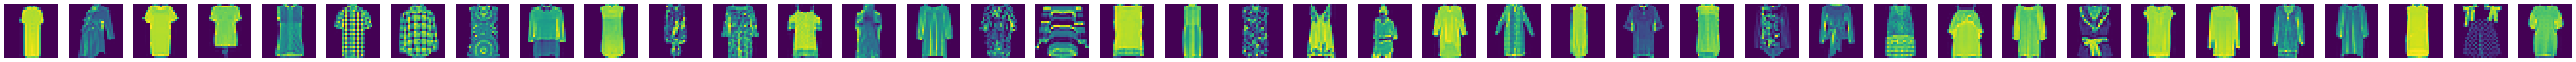

Predicted as Pullover: 75 images


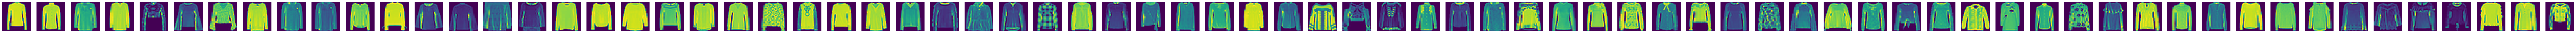

Predicted as Bag: 12 images


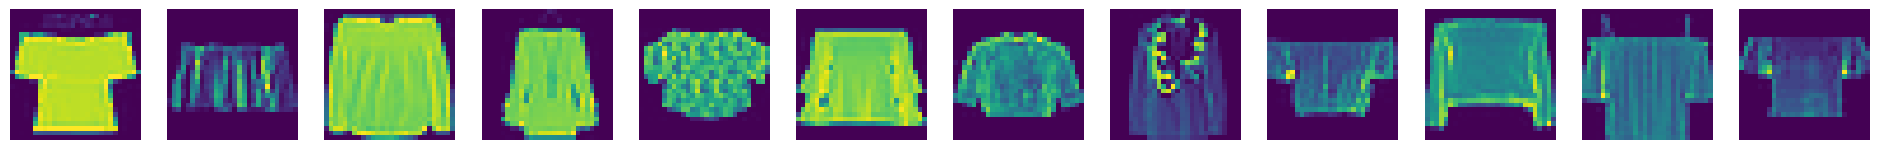

True Class: Dress
Predicted as T-shirt/top: 17 images


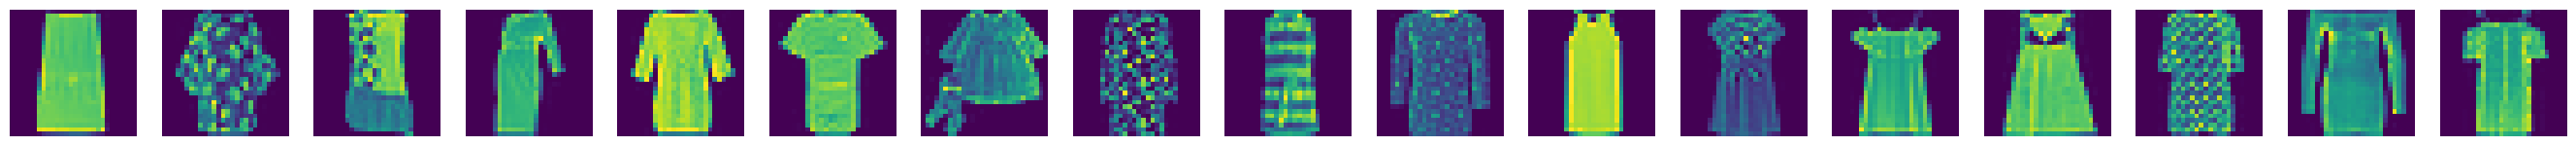

Predicted as Coat: 23 images


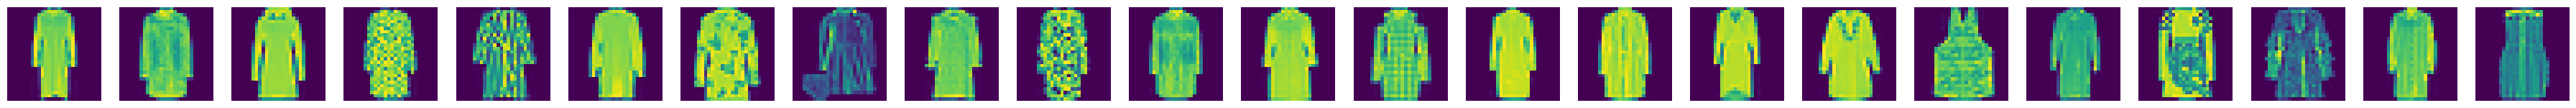

Predicted as Trouser: 12 images


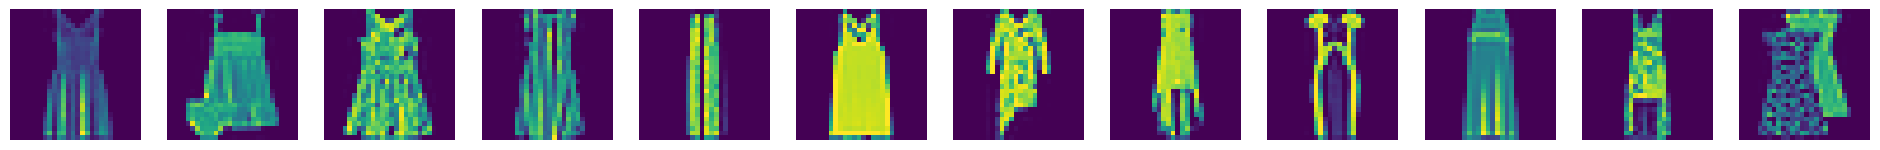

Predicted as Shirt: 22 images


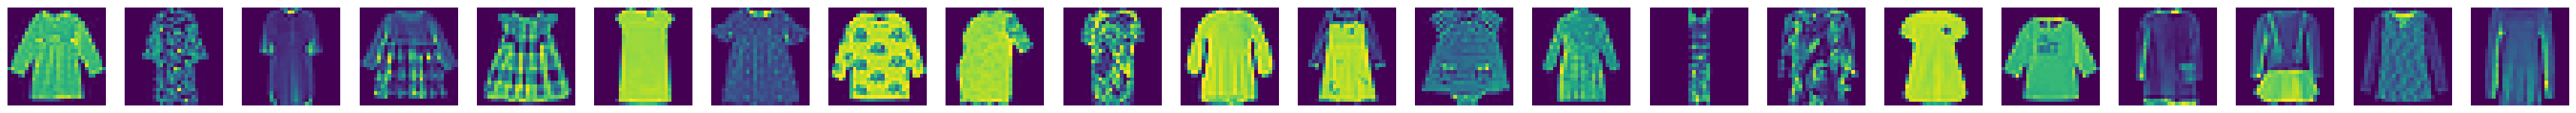

Predicted as Pullover: 10 images


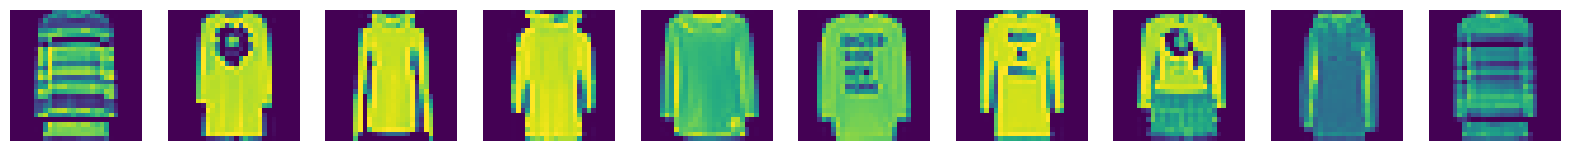

Predicted as Bag: 3 images


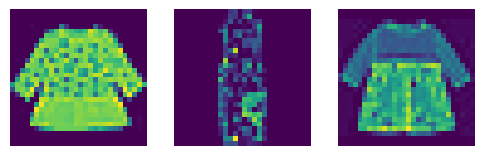

True Class: Pullover
Predicted as Shirt: 55 images


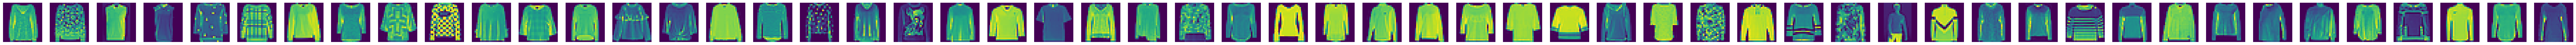

Predicted as T-shirt/top: 22 images


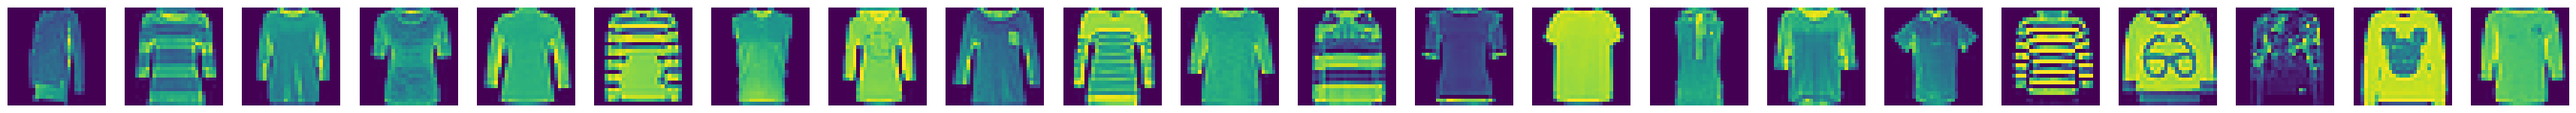

Predicted as Coat: 65 images


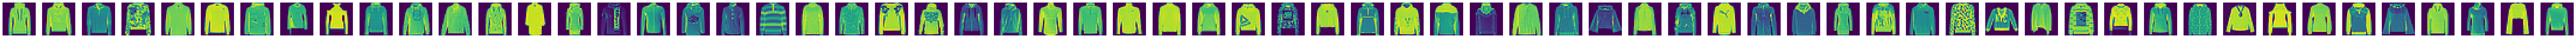

Predicted as Dress: 11 images


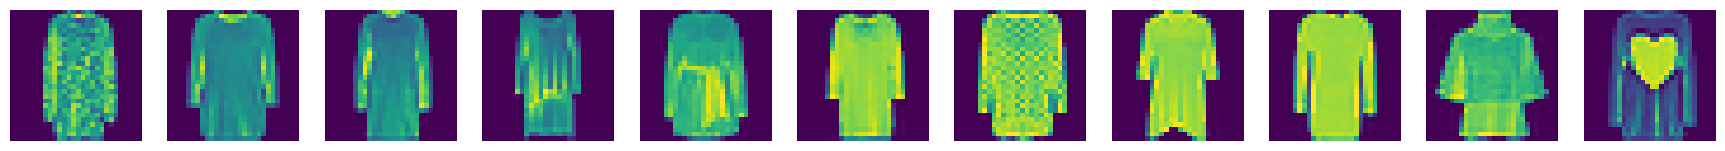

Predicted as Bag: 3 images


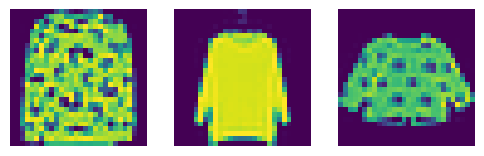

Predicted as Trouser: 1 images


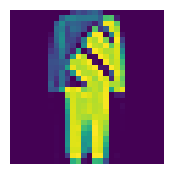

True Class: T-shirt/top
Predicted as Shirt: 95 images


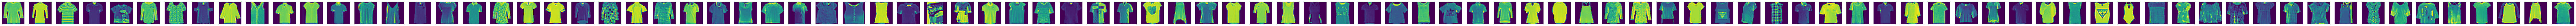

Predicted as Coat: 6 images


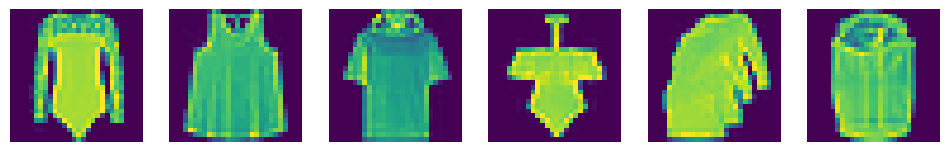

Predicted as Dress: 34 images


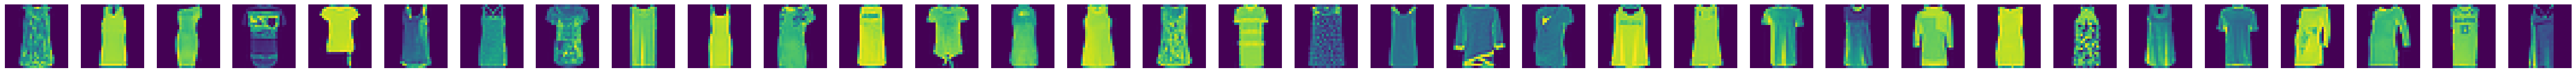

Predicted as Pullover: 12 images


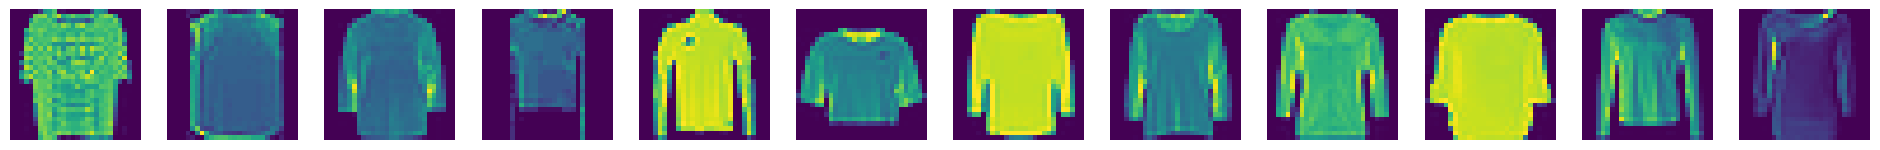

Predicted as Bag: 9 images


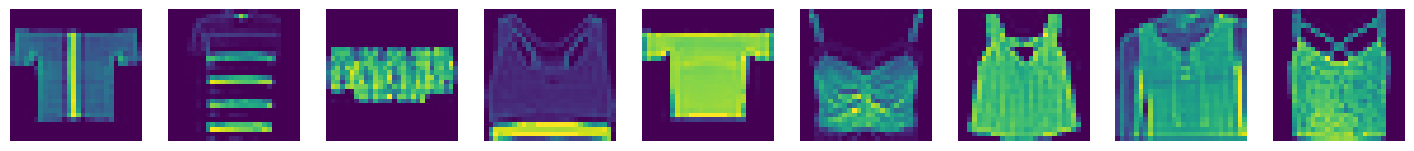

Predicted as Sandal: 2 images


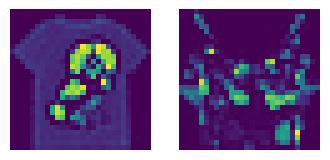

True Class: Bag
Predicted as Pullover: 1 images


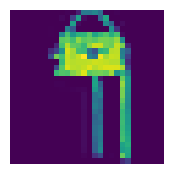

Predicted as Shirt: 6 images


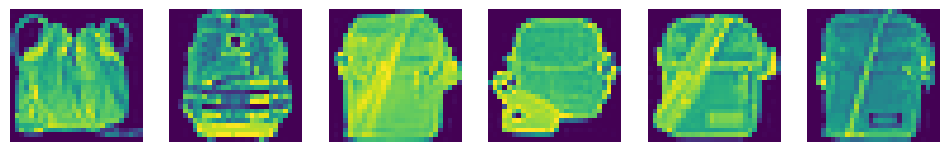

Predicted as Sandal: 1 images


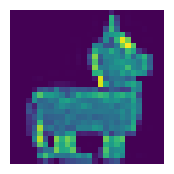

Predicted as Dress: 5 images


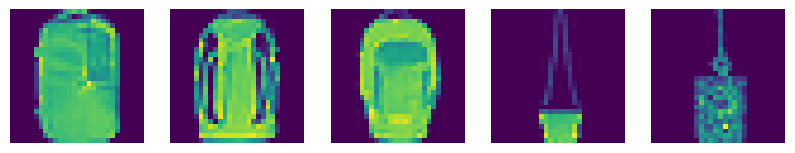

Predicted as T-shirt/top: 4 images


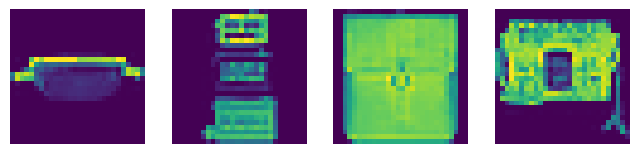

Predicted as Sneaker: 5 images


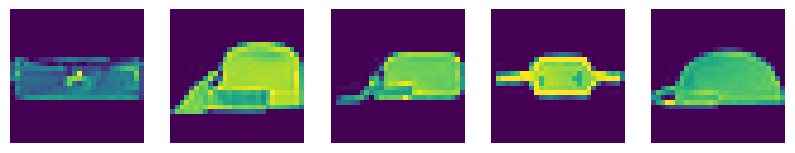

Predicted as Trouser: 2 images


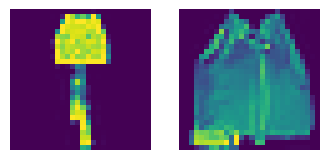

Predicted as Coat: 1 images


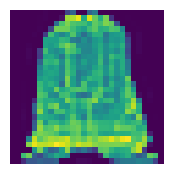

True Class: Trouser
Predicted as Dress: 15 images


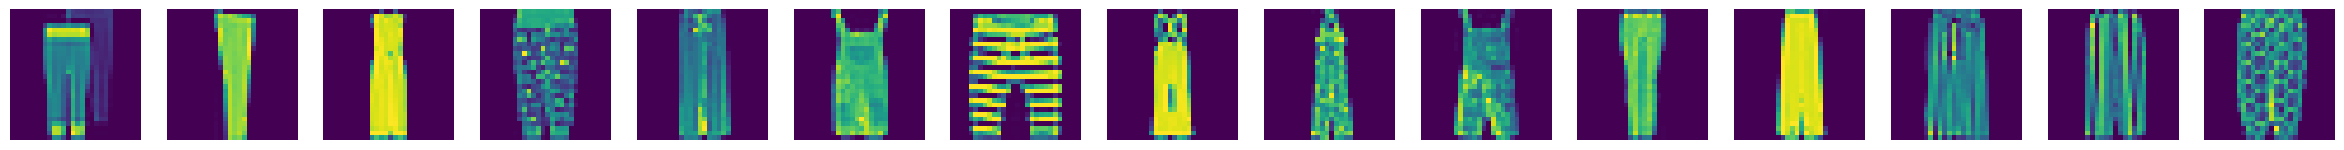

Predicted as Shirt: 2 images


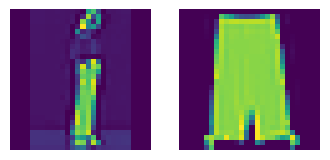

Predicted as Pullover: 1 images


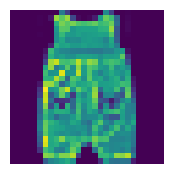

Predicted as Coat: 5 images


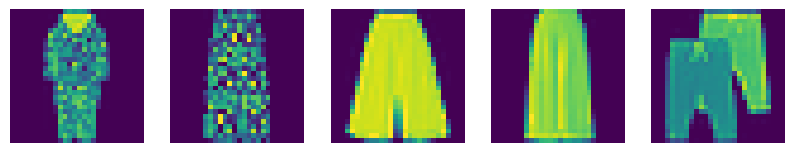

Predicted as Bag: 2 images


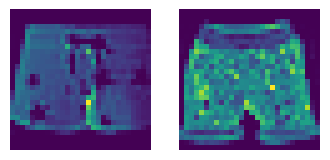

Predicted as T-shirt/top: 1 images


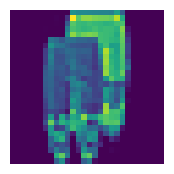

True Class: Sandal
Predicted as Sneaker: 27 images


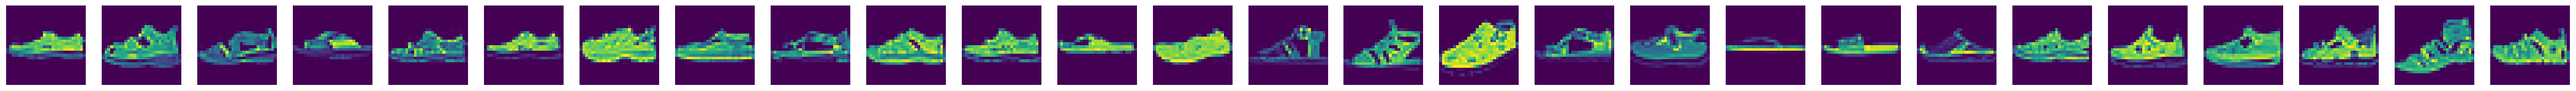

Predicted as Ankle boot: 9 images


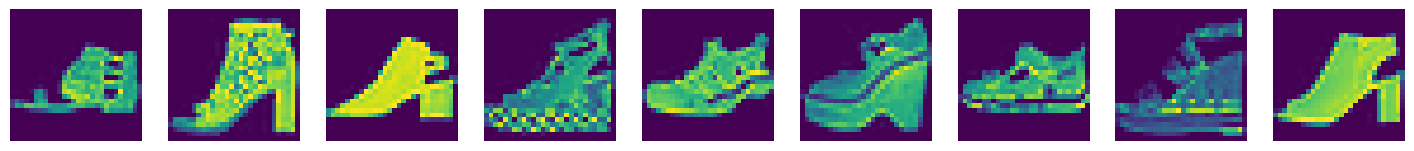

Predicted as Bag: 1 images


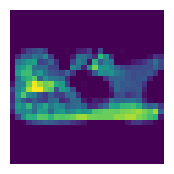

Predicted as Dress: 1 images


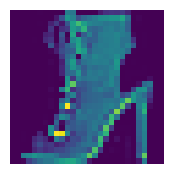

In [8]:
# 테스트 데이터셋 불러오기
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform) # FashionMNIST 테스트 데이터셋을 불러옵니다.
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # DataLoader를 사용하여 테스트 데이터셋을 미니배치로 나누고, 섞지 않습니다.

# 모델 평가 함수 정의
def evaluate_model(model, test_loader):
    model.eval()  # 모델을 평가 모드로 설정
    correct = 0 # 올바르게 예측된 샘플 수를 저장할 변수를 초기화합니다.
    total = 0 # 전체 샘플 수를 저장할 변수를 초기화합니다.
    predictions = [] # 모델의 예측값을 저장할 리스트를 초기화합니다.
    true_labels = [] # 실제 레이블을 저장할 리스트를 초기화합니다.

    with torch.no_grad(): # 그래디언트를 계산하지 않도록 설정합니다.
        for images, labels in test_loader: # 테스트 데이터셋의 미니배치를 반복합니다.
            outputs = model(images) # 모델을 통해 이미지를 예측합니다.
            _, predicted = torch.max(outputs.data, 1) # 가장 큰 값을 가진 클래스를 선택합니다.
            total += labels.size(0) # 미니배치의 샘플 수를 전체에 더합니다.
            correct += (predicted == labels).sum().item() # 올바르게 예측된 샘플 수를 계산하여 누적합니다.

            # 예측과 실제 레이블 저장
            predictions.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

    accuracy = correct / total # 정확도를 계산합니다.
    return accuracy, predictions, true_labels # 정확도와 예측값, 실제 레이블을 반환합니다.

# 잘못 분류된 이미지 분석 함수 정의
def analyze_misclassified_images(predictions, true_labels, test_dataset, classes):
    misclassified_images = [] # 잘못 분류된 이미지를 저장할 리스트를 초기화합니다.
    for i in range(len(predictions)): # 모든 예측값과 실제 레이블에 대해 반복합니다.
        if predictions[i] != true_labels[i]: # 예측값과 실제 레이블이 다른 경우
            misclassified_images.append((test_dataset[i][0], predictions[i], true_labels[i])) # 잘못 분류된 이미지를 리스트에 추가합니다.

    misclassified_classes = {} # 잘못 분류된 클래스를 저장할 딕셔너리를 초기화합니다.
    for image, predicted, true_label in misclassified_images: # 모든 잘못 분류된 이미지에 대해 반복합니다.
        true_class = classes[true_label] # 실제 클래스를 가져옵니다.
        predicted_class = classes[predicted] # 예측된 클래스를 가져옵니다.

        # 잘못 분류된 클래스 기록
        if true_class not in misclassified_classes:
            misclassified_classes[true_class] = {predicted_class: [image]}
        elif predicted_class not in misclassified_classes[true_class]:
            misclassified_classes[true_class][predicted_class] = [image]
        else:
            misclassified_classes[true_class][predicted_class].append(image)

    return misclassified_classes # 잘못 분류된 클래스 딕셔너리를 반환합니다.


# 모델 평가
test_accuracy, test_predictions, test_labels = evaluate_model(model, test_loader) # 모델을 평가하고 정확도와 예측값, 실제 레이블을 가져옵니다.
print(f"Test Accuracy: {test_accuracy * 100:.2f}%") # 테스트 정확도를 출력합니다.

# 잘못 분류된 이미지 분석
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # 클래스 레이블을 정의합니다.

misclassified_classes = analyze_misclassified_images(test_predictions, test_labels, test_dataset, classes) # 잘못 분류된 이미지를 분석합니다.

# 잘못 분류된 이미지 시각화
for true_class, misclassified in misclassified_classes.items(): # 모든 잘못 분류된 클래스에 대해 반복합니다.
    print(f"True Class: {true_class}") # 실제 클래스를 출력합니다.
    for predicted_class, images in misclassified.items(): # 모든 잘못 분류된 이미지에 대해 반복합니다.
        print(f"Predicted as {predicted_class}: {len(images)} images") # 예측된 클래스와 해당 클래스의 이미지 수를 출력합니다.
        fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 2, 2)) # 이미지를 보여줄 subplot을 생성합니다.
        if len(images) == 1:  # 이미지가 하나인 경우
            axes = [axes]  # 리스트로 변환하여 반복 가능하도록 합니다.
        for ax, image in zip(axes, images): # 모든 이미지와 서브플롯에 대해 반복합니다.
            ax.imshow(image.permute(1, 2, 0).numpy()) # 이미지를 시각화합니다.
            ax.axis('off') # 축을 제거합니다.
        plt.show() # 이미지를 시각화합니다.




테스트 정확도(Test Accuracy): 모델이 테스트 데이터셋에서 약 89.37%의 정확도로 예측을 수행했습니다. 이는 테스트 데이터셋에 있는 이미지 중 대략 89.37%에 대해 올바른 예측을 수행했음을 의미합니다.

잘못 분류된 클래스(Misclassified Classes): 테스트 데이터셋에서 "Sneaker" 클래스에 속하는 이미지 중에서 1개의 이미지가 "Bag"로 잘못 분류되었습니다. 이는 모델이 해당 이미지를 신발(Sneaker)이 아닌 가방(Bag)으로 잘못 예측했다는 것을 의미합니다.

시각화: 위의 결과에서 잘못 분류된 이미지를 시각화하여 확인할 수 있습니다. 잘못 분류된 이미지를 시각화하여 모델의 오류 유형을 이해하고 개선 방향을 파악할 수 있습니다.